In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

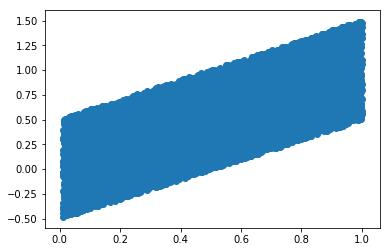

In [12]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

# Assignment 5

## 1. Create and fit a Linear Regression Model

In [13]:
LRM = LinearRegression()

LRM.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
LRM.coef_, LRM.intercept_

(array([ 0.99220001]), 0.0052310168225894182)

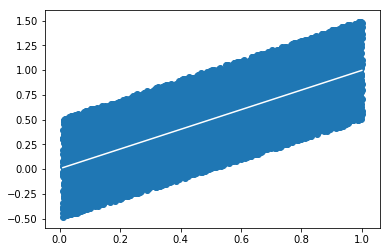

In [15]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, LRM.coef_) + LRM.intercept_, c='white')

Observation: The datapoints are pretty dense, following the positive slope pretty well. Not ton of outliers when the number of datapoints is 10,000. Using all of the data points isn't too helpful to build a model, so let's try parsing it out. 

### Linear Regression Model (with shuffled data points---and a subset)

In [43]:
def shuffle (a,b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p

In [44]:
p = shuffle(x,y)

In [45]:
p

array([2829, 3449, 1488, ..., 5880, 2832, 6793])

In [46]:
LRM = LinearRegression()
LRM.fit(x[p][:5000], y[p][:5000])
LRM.coef_, LRM.intercept_

(array([ 0.99195179]), 0.012932171874793674)

Observation: This output shows a similar slope as before with less points (original model had a Coefficient of 0.9922)

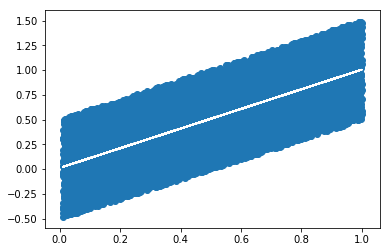

In [47]:
plt.scatter(x[p],y[p])
plt.plot(x[p], np.dot(x[p], LRM.coef_) + LRM.intercept_, c='white')

#### Let's calculate the mean_squared_error, to see how our model is doing. Using the latter 5,000 points (instead of the first 5,000 points in our model).

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[p][5000:], np.dot(x[p][5000:], LRM.coef_) + LRM.intercept_)

0.083135813720360371

## Calculate the Training error and Testing error using sklearn with a .50 split 
For error, use `mean_squared`, but if you want to experiment with other mean errors, please do!

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [51]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 0.99224974]), 0.0065927374573923059)

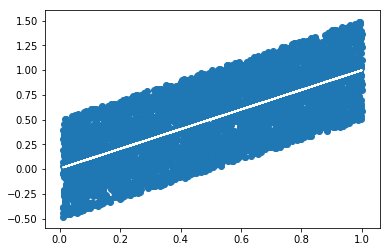

In [56]:
plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

In [58]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.082195735025246963

In [60]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

(array([ 0.99210529]), 0.003891841419164821)

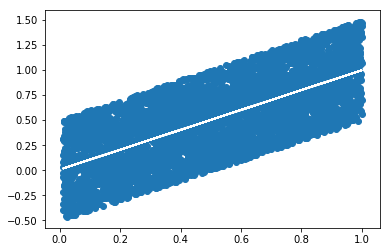

In [59]:
plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='w')

In [55]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.082464973360869956

Observation: In the new model, the training and test data sets had very similar mean squared errors.  Even plotting them you can see that the coefficient values are similar (and appear to be a pretty good fit for the data).

## 2.  Repeat #1 for a Ridge Regression

In [61]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([ 0.98988426]), 0.0077901897931105246)

Observation: Though not terribly far off, the Linear Regression model seemd to be a better fit as the coefficient was 0.99, rathern than the 0.98 in the Ridge model.

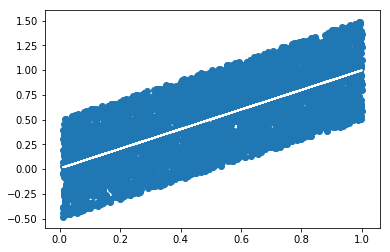

In [62]:
plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

In [63]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.082196203334520462

In [64]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

(array([ 0.98962147]), 0.0051431398876491397)

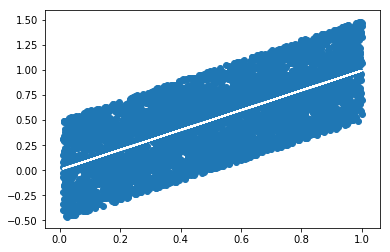

In [65]:
plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='w')

In [66]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.082457770085846954

Observation: The mean squared error for the Ridge regression models were about the same as those for the linear regression models.

## 3. Vary the `split` size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. `split` size. Create separate plots for Linear and Ridge

In [67]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5

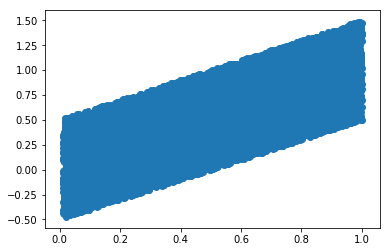

In [68]:
plt.scatter(x,y)

##### Split size 0.01

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01)

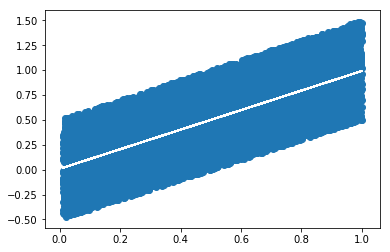

In [72]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

In [71]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.084004778228922411

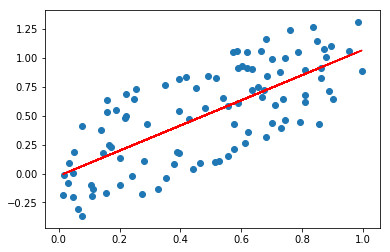

In [74]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

In [75]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.083700916618668214

0.082471069186763737

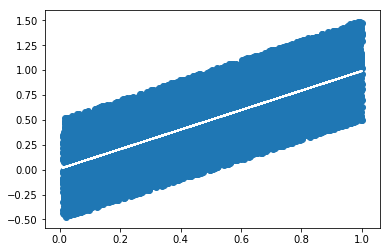

In [78]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.084903680163585543

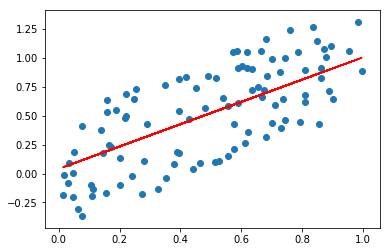

In [81]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.05

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)

0.08267522786837217

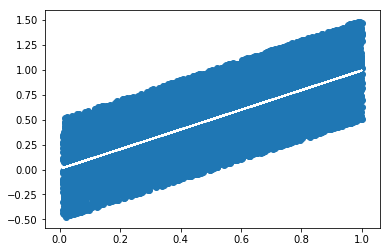

In [83]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.078501546491872298

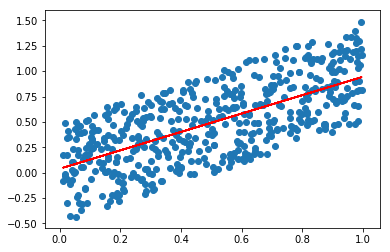

In [84]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.082675360108087514

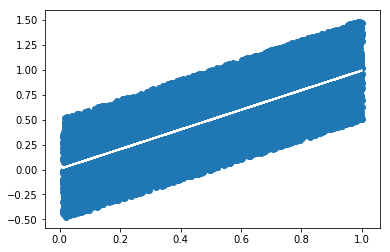

In [85]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.078537991495361129

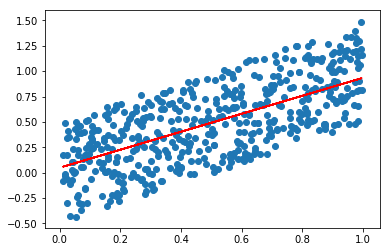

In [86]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.12

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.12)


0.08197466269566378

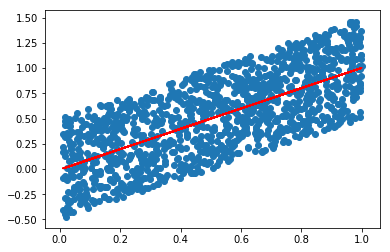

In [89]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)


0.082559849883168418

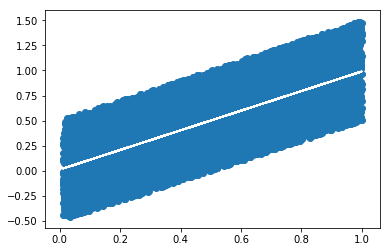

In [90]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.08256000161055356

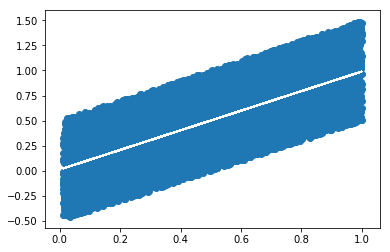

In [91]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.081982941571122486

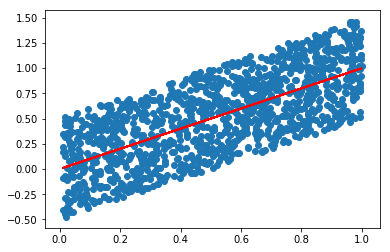

In [92]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Spilt size 0.25

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

0.081510542027231805

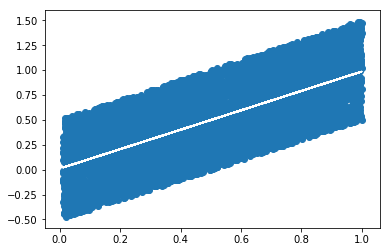

In [94]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.085362521308567876

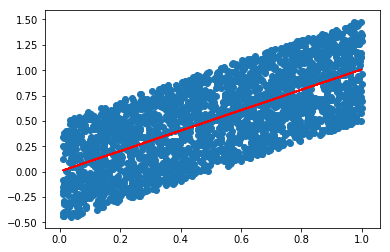

In [95]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.081510749073680971

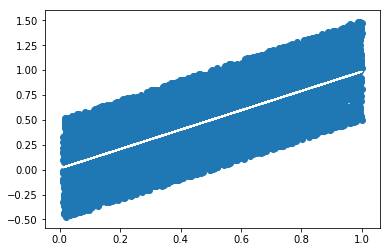

In [96]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.085364462816918882

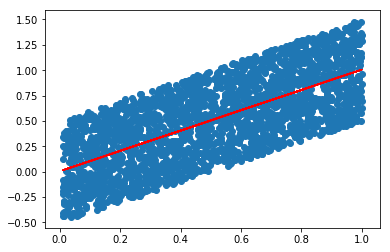

In [97]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.4

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

0.083004401127523733

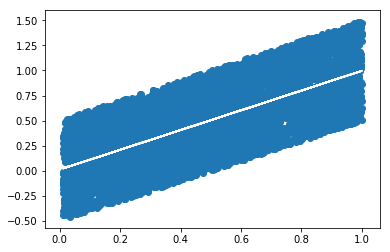

In [102]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.081688273373145603

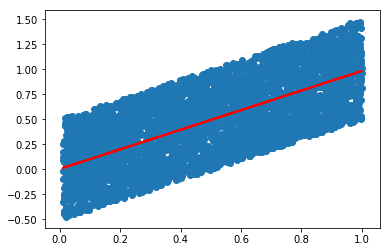

In [103]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.083004728349007795

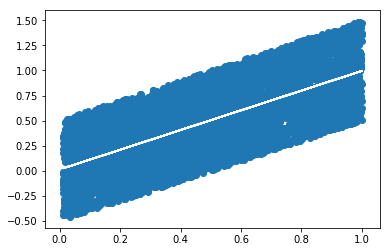

In [104]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.081689009211465477

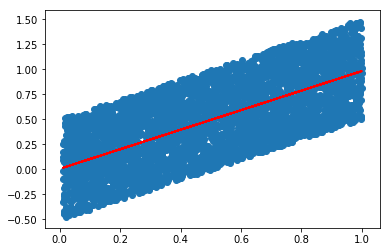

In [105]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.59

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.59)


0.083228054405455054

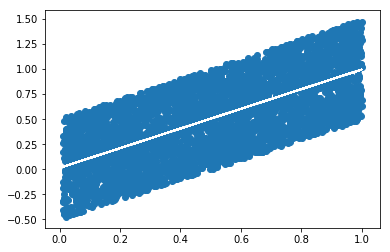

In [108]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)



0.08196194766436736

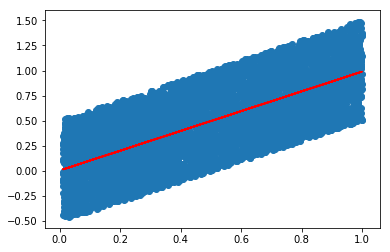

In [109]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)


0.083228754980502015

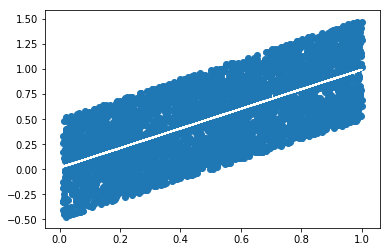

In [110]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.081962285622924888

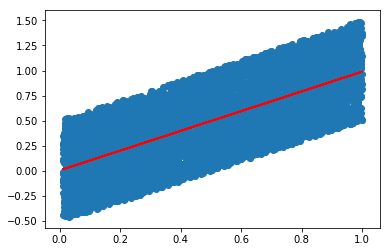

In [111]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.63

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.63)


0.083961349802302201

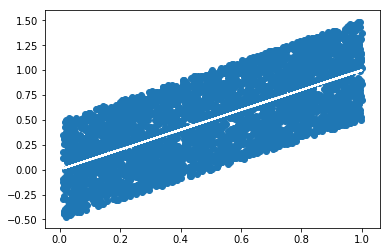

In [113]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.081617968569034707

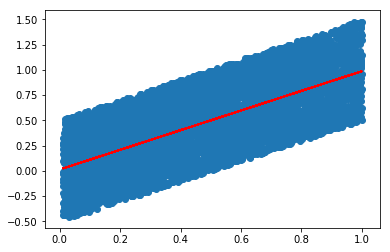

In [114]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.08396223309012299

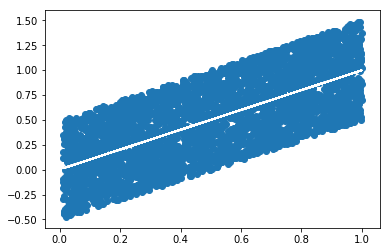

In [115]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.081618260432184925

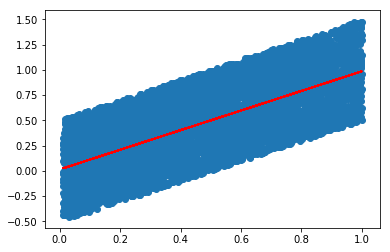

In [116]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.75

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.75)


0.082648866169413332

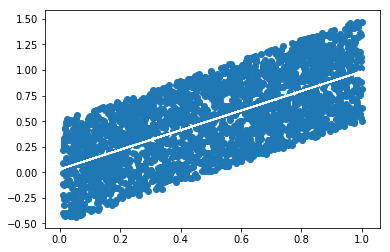

In [118]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.082398718735410451

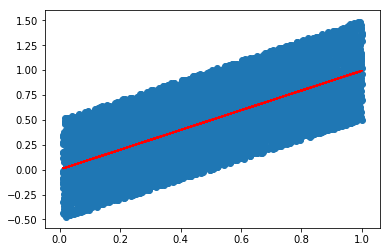

In [119]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)


0.082650652413146605

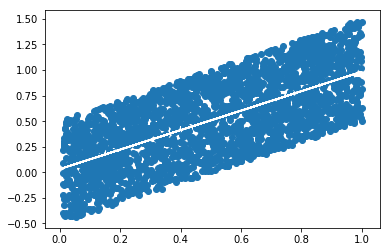

In [120]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.082398931578186257

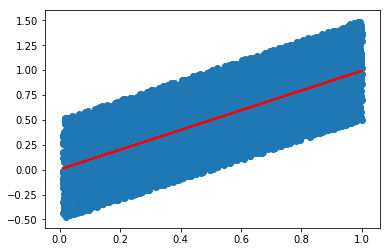

In [121]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.83

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.83)


0.08270955850363608

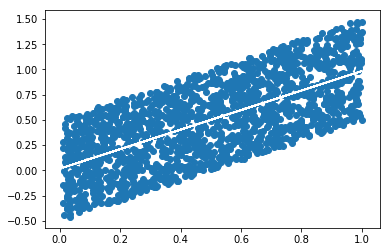

In [123]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.082448893213652313

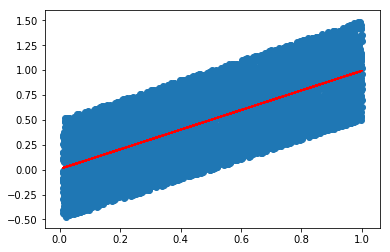

In [124]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)


0.082713511318843233

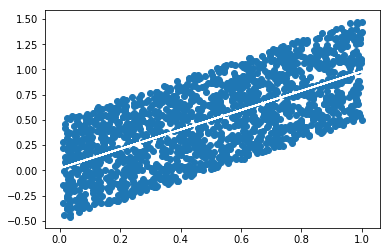

In [125]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.082449065179953249

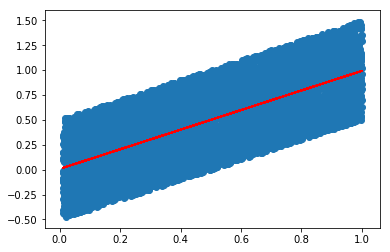

In [126]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.9

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9)


0.082206565849538657

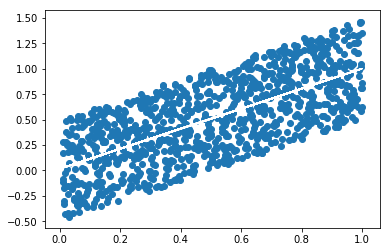

In [129]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.082521441165447282

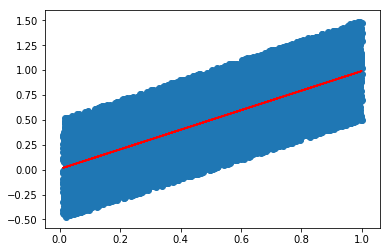

In [130]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)


0.082218083549553553

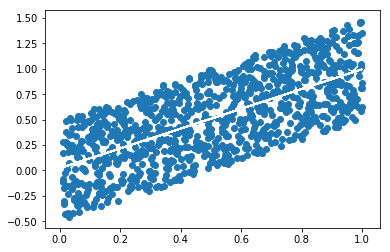

In [131]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='w')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.082521586848692374

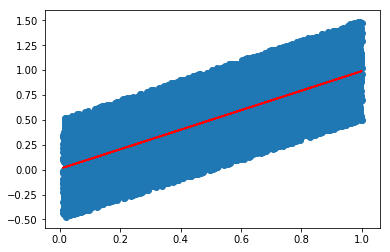

In [132]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

##### Split size 0.99

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.99)


0.081023983325514373

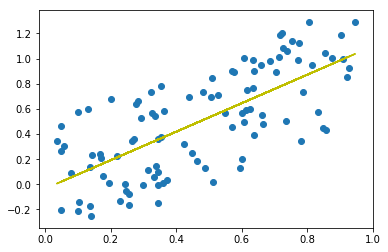

In [135]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='y')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.082489126235240504

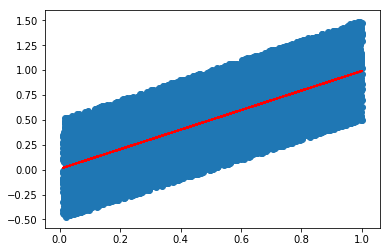

In [136]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.082501619717168739

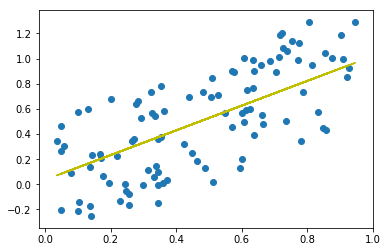

In [138]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='y')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.082489246140031225

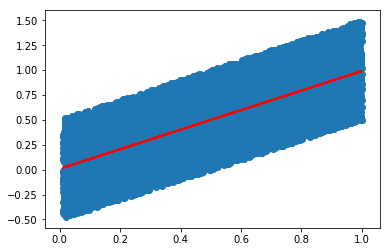

In [139]:
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='r')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

## Plot the resulting Training error and Testing error vs. split size. 

In [146]:
import pandas as pd
MSErrors = pd.read_csv('/Users/user/Documents/_JHU/2017/SU17_Machine Learning and Neural Networks/Week 5/MSerrors.csv')
MSErrors.head()


,Split Size,MSE_Train Linear,MSE_Test Linear,MSE_Train Ridge,MSE_Test Ridge
0,0.01,0.084005,0.084005,0.082471,0.084904
1,0.05,0.082675,0.078502,0.082675,0.078538
2,0.12,0.082560,0.081975,0.082560,0.081983
3,0.25,0.081511,0.085363,0.081511,0.085364
4,0.40,0.083004,0.081688,0.083005,0.081689


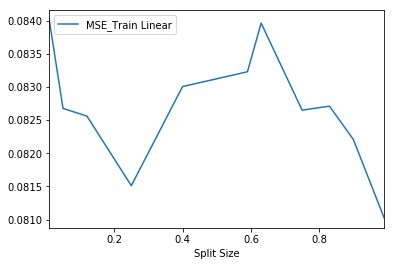

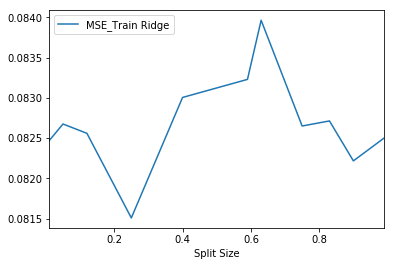

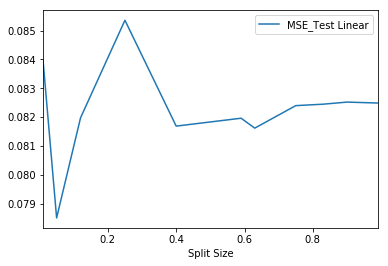

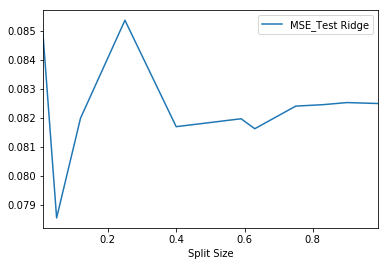

In [175]:
MSErrors.plot(x='Split Size', y='MSE_Train Linear')
MSErrors.plot(x='Split Size', y='MSE_Train Ridge')
MSErrors.plot(x='Split Size', y='MSE_Test Linear')
MSErrors.plot(x='Split Size', y='MSE_Test Ridge')


### Plot them all together to have a better visual.

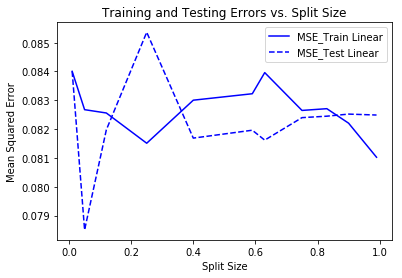

In [176]:
splitsize= [0.01, 0.05, 0.12, 0.25, 0.4, 0.59, 0.63, 0.75, 0.83, 0.9, 0.99]
MSE_TrainLinear= [0.084004778, 0.082675228, 0.08255985, 0.081510542, 0.083004401, 0.083228054, 0.08396135, 0.082648866, 0.082709559, 0.082206566, 0.081023983]
MSE_TestLinear= [0.084004778, 0.078501546, 0.081974663, 0.085362521, 0.081688273, 0.081961948, 0.081617969, 0.082398719, 0.082448893, 0.082521441, 0.082489126]
MSE_TrainRidge= [0.082471069 , 0.08267536, 0.082560002, 0.081510749, 0.083004728, 0.083228755, 0.083962233, 0.082650652, 0.082713511, 0.082218084, 0.08250162]
MSE_TestRidge= [0.08490368, 0.078537991, 0.081982942, 0.085364463, 0.081689009, 0.081962286, 0.08161826, 0.082398932, 0.082449065, 0.082521587, 0.082489246]

plt.plot(splitsize, MSE_TrainLinear, color='b', label='MSE_Train Linear')
plt.plot(splitsize, MSE_TestLinear, linestyle='--', color='b', label='MSE_Test Linear')
plt.xlabel('Split Size')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors vs. Split Size')
plt.legend()
plt.show()


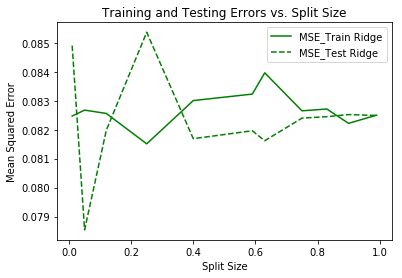

In [177]:
plt.plot(splitsize, MSE_TrainRidge, color='g', label='MSE_Train Ridge')
plt.plot(splitsize, MSE_TestRidge, linestyle='--', color='g', label='MSE_Test Ridge')
plt.xlabel('Split Size')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors vs. Split Size')
plt.legend()
plt.show()

Observation: It appears that the models using the test data has more variances in the error as the split size is smaller.  As the split size increases, particularly around a split size between 0.7 and 0.9, the errors with tne training and testing data set are closest.  

## 4. Chose an ideal split size based on the previous plot for Ridge.
## Vary the Ridge parameter `alpha` from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the `alpha` parameter's stiffness.

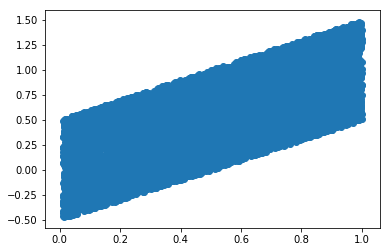

In [181]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8)

0.08588026342684911

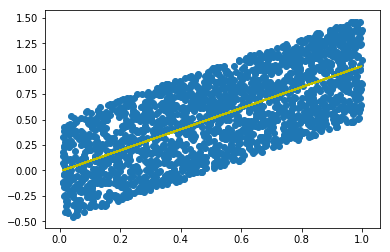

In [183]:
ridge = linear_model.Ridge(alpha=0.5)
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='y')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.083904727105296451

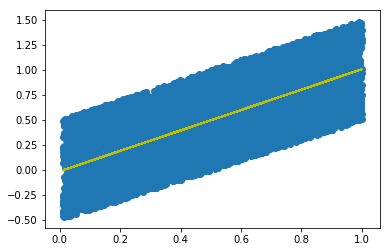

In [184]:
ridge = linear_model.Ridge(alpha=0.5)
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='y')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)


0.08588026342684911

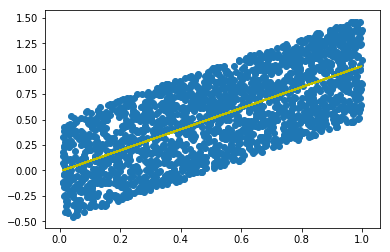

In [185]:
ridge = linear_model.Ridge(alpha=100)
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='y')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.083904727105296451

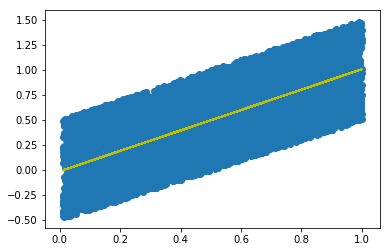

In [186]:
ridge = linear_model.Ridge(alpha=100)
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='y')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)


0.08588026342684911

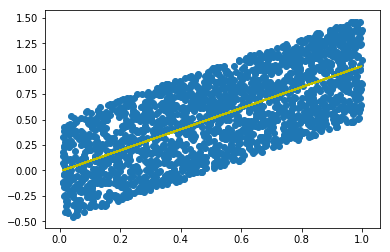

In [189]:
ridge = linear_model.Ridge(alpha=40)
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, c='y')

mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)


0.083904727105296451

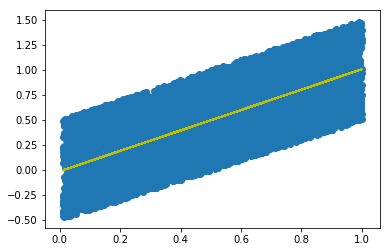

In [190]:
ridge = linear_model.Ridge(alpha=40)
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='y')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)


### Plot the Train and Test error. 

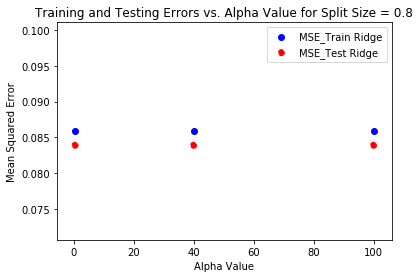

In [194]:
Alpha = [0.5, 40, 100]
MSE_TrainRidge = [0.08588026342684911,0.08588026342684911, 0.08588026342684911]
MSE_TestRidge = [0.083904727105296451, 0.083904727105296451, 0.083904727105296451]
plt.scatter(Alpha, MSE_TrainRidge, color='b', label='MSE_Train Ridge')
plt.scatter(Alpha, MSE_TestRidge, linestyle='--', color='r', label='MSE_Test Ridge')
plt.xlabel('Alpha Value')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors vs. Alpha Value for Split Size = 0.8')
plt.legend()
plt.show()

Observation: Despite changes in the value of alpha, the errors remained the same across the training and the testing sets. The testing set is slightly lower than the training set. It appears that the alpha value has no impact. 

## Bonus. Either: Generate data  with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. `alpha`, `degree`, etc.)

In [195]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')


Data Exists: 2016 Q1 | ../data/2016-Q1-cabi-trip-history-data.csv


In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


In [197]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour_of_day
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,23.98
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,23.95
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,23.95


In [206]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

In [215]:
from sklearn.preprocessing import PolynomialFeatures
poly17 = PolynomialFeatures(degree=17)

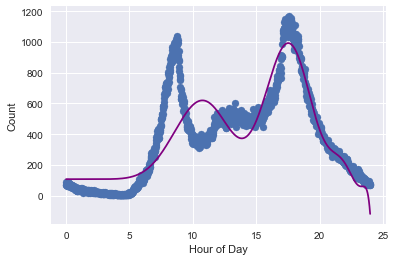

In [218]:
x_17 = poly17.fit_transform(x)

linear = linear_model.LinearRegression()

linear.fit(x_17, y)

plt.scatter(x,y)
plt.plot(x, np.dot(x_17, linear.coef_) + linear.intercept_, c='purple')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7)

80742.512994864301

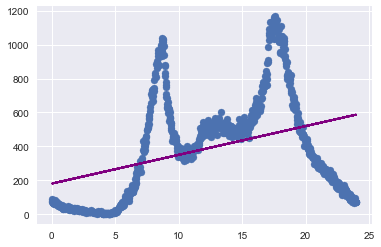

In [223]:
ridge = linear_model.Ridge(alpha=0.5)
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='purple')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

80742.512994864301

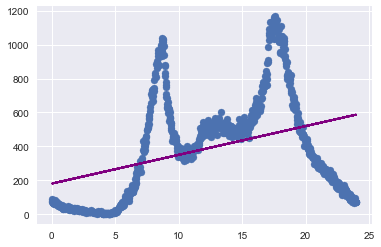

In [224]:
ridge = linear_model.Ridge(alpha=8000)
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='purple')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

80742.512994864301

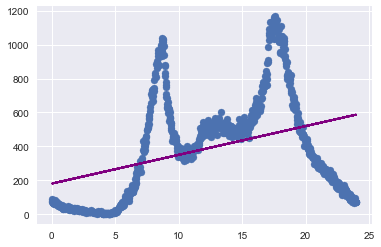

In [225]:
ridge = linear_model.Ridge(alpha=-80)
model = Ridge()
model.fit(x_test, y_test)
model.coef_, model.intercept_

plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, c='purple')

mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

Observation: Even for a data with a polynomial shape, the alpha's value does not seem to have an effect on the Mean Squared Error (which is 80742.512 for all of our alpha values in the Ridge Regression models). 